# Preprocessing data with ecv and nutritional metrics 

### Objective

The objective of this notebook is to preprocess the data through the following five steps:

1. Handling Missing Data
2. Exploratory Data Analysis (EDA)
3. Data Visualization and PCA
4. Outlier Detection
5. Bias Detection


In [31]:
import pandas as pd
import requests
from pathlib import Path
import json
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from pathlib import Path
import sys

project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.utils import *

In [2]:
DATA_DIR = Path(project_root / "data")
RECIPES_FILE = DATA_DIR / "all_recipes_clean.json"

In [3]:
with open(RECIPES_FILE, "r", encoding="utf-8") as f:
    recipes = json.load(f)

df = pd.DataFrame(recipes)

## 1. Handling missing data 

In [4]:
col_missing = pd.DataFrame({
    "contain missing data": df.isna().sum() != 0,
    "missing_frequency": df.isna().mean() * 100
})
display(col_missing)

,contain missing data,missing_frequency
title,False,0.0
url,False,0.0
rating,False,0.0
ingredients,False,0.0
total_ecv,False,0.0
total_kcal,False,0.0
total_protein,False,0.0
total_fat,False,0.0
is_vege,False,0.0


## 2. Exploratory Data Analysis (EDA)

In [21]:
print("Shape (rows, cols):", df.shape)
print("Number of elements:", df.size)
print(df.dtypes)
print(df["ingredients"])

Shape (rows, cols): (2049, 17)
Number of elements: 34833
title              object
url                object
rating            float64
ingredients        object
total_ecv         float64
total_kcal        float64
total_protein     float64
total_fat         float64
is_vege             int64
ecv_scaled        float64
kcal_scaled       float64
protein_scaled    float64
fat_scaled        float64
ecv_scaled        float64
kcal_scaled       float64
protein_scaled    float64
fat_scaled        float64
dtype: object
0       [{'ingredient_name': 'tomates', 'quantity': 20...
1       [{'ingredient_name': 'poireau', 'quantity': 15...
2       [{'ingredient_name': 'carotte', 'quantity': 40...
3       [{'ingredient_name': 'oeuf', 'quantity': 60.0,...
4       [{'ingredient_name': 'beurre', 'quantity': 20....
                              ...                        
2044    [{'ingredient_name': 'carottes', 'quantity': 1...
2045    [{'ingredient_name': 'beurre', 'quantity': 100...
2046    [{'ingredient_n

Nombre de recettes par catégorie

is_vege
0    1074
1     975
Name: count, dtype: int64


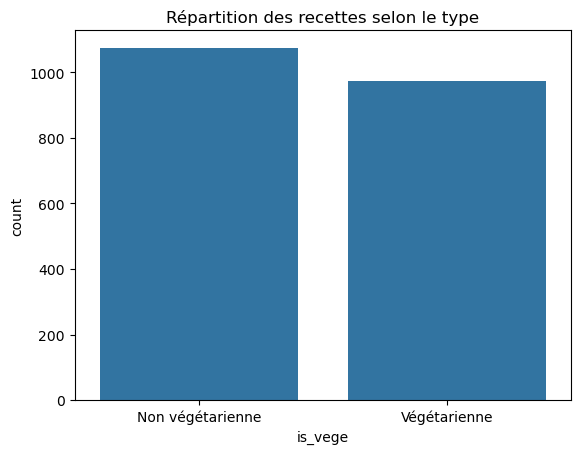

In [38]:
print(df["is_vege"].value_counts())
sns.countplot(x="is_vege", data=df)
plt.xticks([0,1], ["Non végétarienne", "Végétarienne"])
plt.title("Répartition des recettes selon le type")
plt.show()

Statistiques descriptives

In [22]:
display(df.describe())

,rating,total_ecv,total_kcal,total_protein,total_fat,is_vege,ecv_scaled,kcal_scaled,protein_scaled,fat_scaled,ecv_scaled,kcal_scaled,protein_scaled,fat_scaled
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2.049000e+03,2049.000000,2.049000e+03,2049.000000,2.049000e+03,2049.000000,2.049000e+03
mean,3.566227,4.365994,1265.643879,79.710559,85.482191,0.475842,0.000000,8.322609e-17,0.000000,-1.664522e-16,0.000000,8.322609e-17,0.000000,-1.664522e-16
std,1.823196,8.337738,1824.189617,107.385338,161.573932,0.499538,1.000244,1.000244e+00,1.000244,1.000244e+00,1.000244,1.000244e+00,1.000244,1.000244e+00
min,0.000000,-0.079133,-59.333333,-0.721111,-6.170000,0.000000,-0.533264,-7.265147e-01,-0.749183,-5.673846e-01,-0.533264,-7.265147e-01,-0.749183,-5.673846e-01
25%,3.300000,0.280811,284.836364,20.468586,12.927273,0.000000,-0.490083,-5.377988e-01,-0.551811,-4.491605e-01,-0.490083,-5.377988e-01,-0.551811,-4.491605e-01
50%,4.400000,1.341192,584.200000,40.771010,25.334545,0.000000,-0.362873,-3.736510e-01,-0.362704,-3.723517e-01,-0.362873,-3.736510e-01,-0.362704,-3.723517e-01
75%,4.800000,4.250361,1373.316667,94.759394,75.062500,1.000000,-0.013872,5.903941e-02,0.140173,-6.450443e-02,-0.013872,5.903941e-02,0.140173,-6.450443e-02
max,5.000000,70.944551,13396.533333,872.433766,1330.613333,1.000000,7.987156,6.651639e+00,7.383845,7.708144e+00,7.987156,6.651639e+00,7.383845,7.708144e+00


Distributions

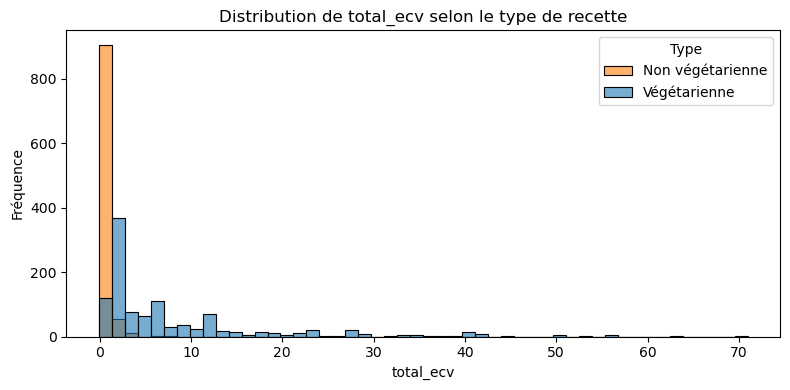

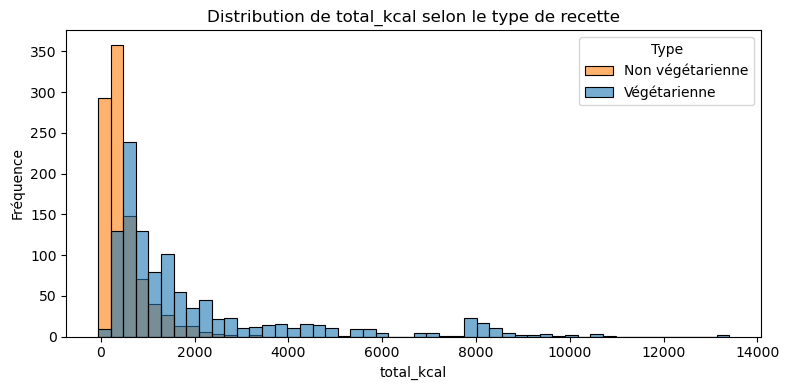

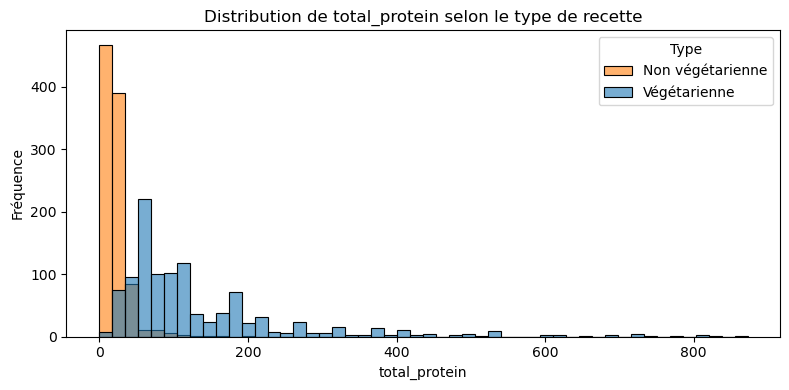

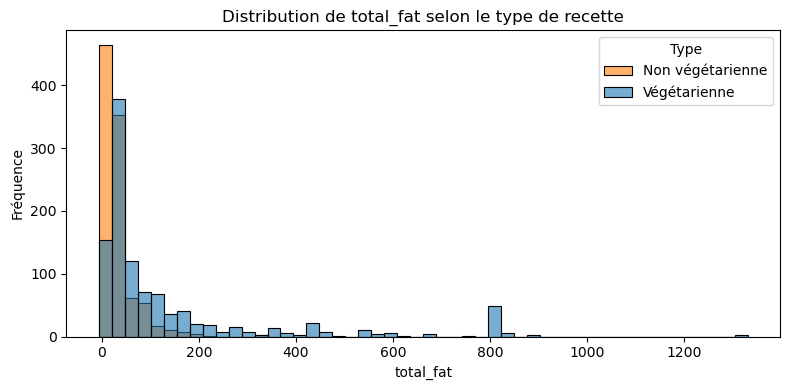

In [40]:
num_cols = ['total_ecv', 'total_kcal', 'total_protein', 'total_fat']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, hue='is_vege', bins=50, alpha=0.6)
    plt.title(f"Distribution de {col} selon le type de recette")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.legend(title="Type", labels=["Non végétarienne", "Végétarienne"])
    plt.tight_layout()
    plt.show()

Comparaison de moyennes

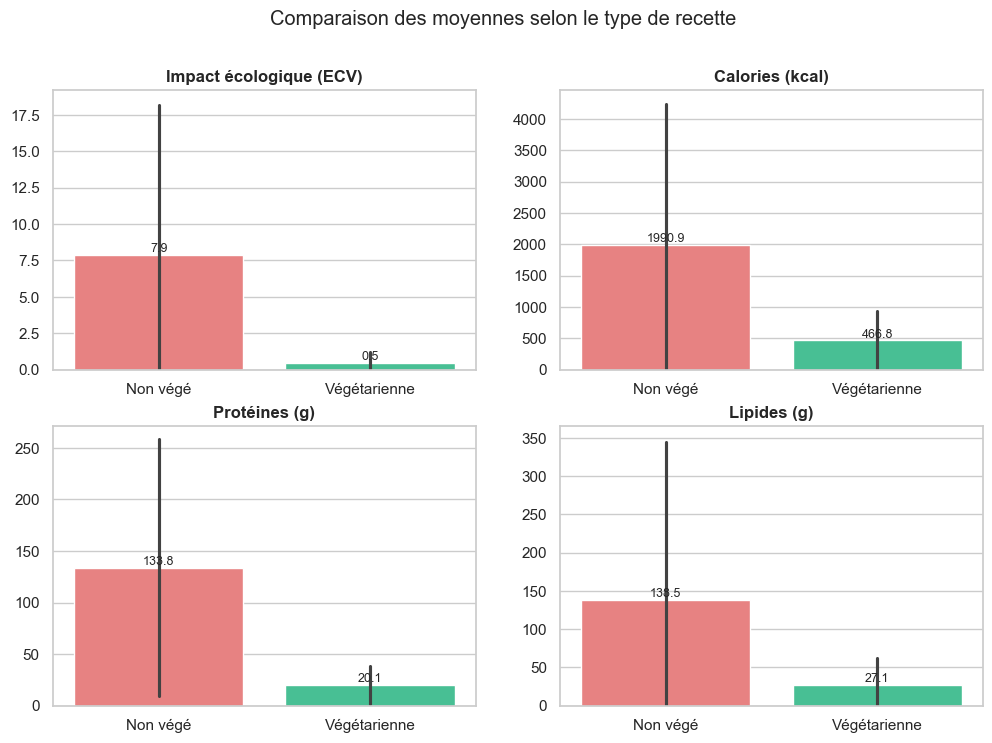

In [51]:

metrics = ['total_ecv', 'total_kcal', 'total_protein', 'total_fat']
labels = {
    'total_ecv': "Impact écologique (ECV)",
    'total_kcal': "Calories (kcal)",
    'total_protein': "Protéines (g)",
    'total_fat': "Lipides (g)"
}

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  
axes = axes.flatten()  # pour boucler facilement

for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df,
        x='is_vege',
        y=metric,
        errorbar='sd',
        palette=['#F87171', '#34D399'],  # rouge (non vege) / vert (vege)
        ax=ax
    )
    ax.set_title(labels[metric], weight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(["Non végé", "Végétarienne"])
    ax.set_ylim(bottom=0) 

    # Ajouter les valeurs moyennes sur les barres
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f"{value:.1f}",
                    (p.get_x() + p.get_width() / 2., value),
                    ha='center', va='bottom', fontsize=9)

plt.suptitle("Comparaison des moyennes selon le type de recette")
plt.show()

Correlations

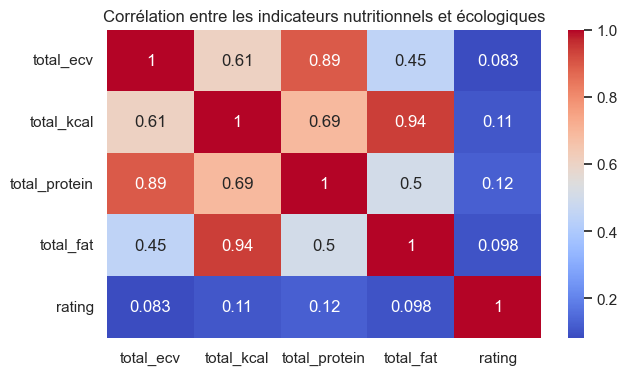

In [114]:
# Toutes recettes
plt.figure(figsize=(7,4))
sns.heatmap(df[['total_ecv', 'total_kcal', 'total_protein', 'total_fat', 'rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les indicateurs nutritionnels et écologiques")
plt.show()

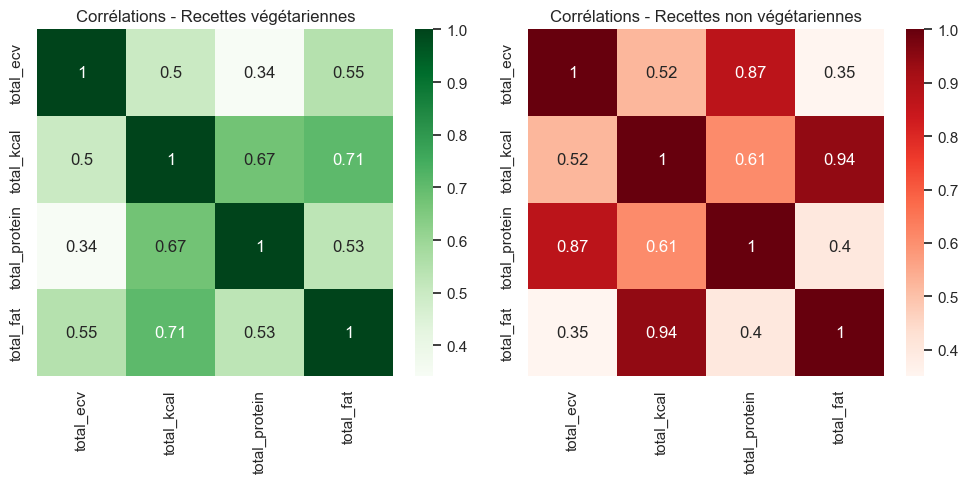

In [56]:
# Par type de recette
corr_vege = df[df['is_vege']==1][['total_ecv','total_kcal','total_protein','total_fat']].corr()
corr_nonvege = df[df['is_vege']==0][['total_ecv','total_kcal','total_protein','total_fat']].corr()

fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.heatmap(corr_vege, annot=True, cmap="Greens", ax=axes[0])
sns.heatmap(corr_nonvege, annot=True, cmap="Reds", ax=axes[1])
axes[0].set_title("Corrélations - Recettes végétariennes")
axes[1].set_title("Corrélations - Recettes non végétariennes")
plt.tight_layout()
plt.show()

Scatterplots

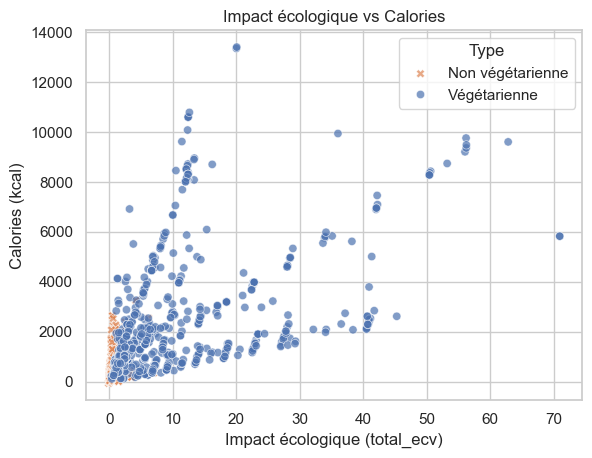

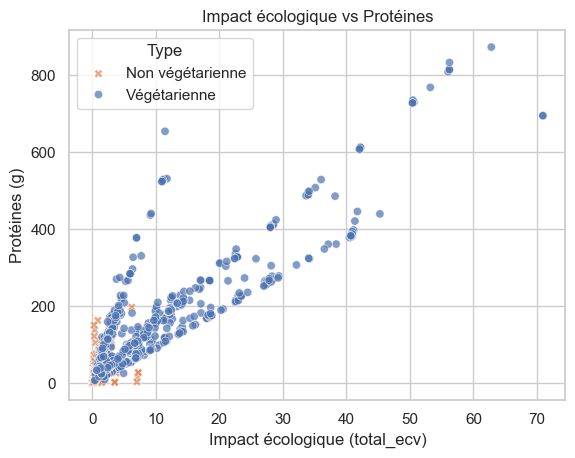

In [57]:
sns.scatterplot(data=df, x='total_ecv', y='total_kcal', hue='is_vege', style='is_vege', alpha=0.7)
plt.title("Impact écologique vs Calories")
plt.xlabel("Impact écologique (total_ecv)")
plt.ylabel("Calories (kcal)")
plt.legend(title="Type", labels=["Non végétarienne", "Végétarienne"])
plt.show()

sns.scatterplot(data=df, x='total_ecv', y='total_protein', hue='is_vege', style='is_vege', alpha=0.7)
plt.title("Impact écologique vs Protéines")
plt.xlabel("Impact écologique (total_ecv)")
plt.ylabel("Protéines (g)")
plt.legend(title="Type", labels=["Non végétarienne", "Végétarienne"])
plt.show()

La normalization ne change rien aux graphes

Recettes les plus et moins écologiques

In [63]:
print("Recettes les plus sobres écologiquement :")
display(df.nsmallest(8, 'total_ecv')[['title', 'total_ecv', 'total_kcal', 'total_protein', 'rating', "is_vege"]])

print("Recettes les plus impactantes écologiquement :")
display(df.nlargest(8, 'total_ecv')[['title', 'total_ecv', 'total_kcal', 'total_protein', 'rating', "is_vege"]])

df["score"] = df["total_protein_std"] - df["total_ecv_std"]
top_recipes = df.nlargest(8, "score")[["title","total_ecv", 'total_kcal', "total_protein","rating", "is_vege"]]
print("Recettes les plus optimales (riches en protéines, faibles en impact écologique) :")
display(top_recipes)

Recettes les plus sobres écologiquement :


,title,total_ecv,total_kcal,total_protein,rating,is_vege
387,Tartelettes au pamplemousse curd vegan,-0.079133,-59.333333,-0.721111,0.0,1
692,Gâteau de Savoie léger abricot et amandes,-0.079133,-59.333333,-0.721111,0.0,1
737,Gratin de poire aux flocons d'avoine léger,-0.079133,-59.333333,-0.721111,0.0,1
749,Sauce légère pour cabillaud,-0.079133,-59.333333,-0.721111,3.0,1
300,Yaourt à boire au coulis de caramel crémeux à ...,0.000000,0.000000,0.000000,0.0,1
472,Sauce légère pour salades et crudités,0.000000,0.000000,0.000000,4.8,1
529,Sauce orientale légère menthe curry,0.000000,0.000000,0.000000,4.9,1
592,Chou-fleur gratiné léger,0.000000,0.000000,0.000000,4.4,1


Recettes les plus impactantes écologiquement :


,title,total_ecv,total_kcal,total_protein,rating,is_vege
1016,Kebab capucin à l'effiloché d'agneau,70.944551,5823.918182,694.217727,0.0,0
1632,Kebab capucin à l'effiloché d'agneau,70.944551,5823.918182,694.217727,0.0,0
1685,Boeuf bourguignon express,62.825185,9600.044156,872.433766,4.8,0
1913,Chili burger (burger épicé),56.243701,9480.680519,832.419221,0.0,0
1756,Daube provençale à l'ancienne,56.222673,9357.044156,813.913766,4.5,0
1063,Filet mignon de porc fondant en cocotte,56.196248,9754.710823,814.093766,4.6,0
1061,Daube provençale,56.025271,9202.494156,808.391266,4.4,0
1565,"Rôti de boeuf au four, sauce aux champignons e...",53.217423,8736.051948,767.822078,4.9,0


Recettes les plus optimales (riches en protéines, faibles en impact écologique) :


,title,total_ecv,total_kcal,total_protein,rating,is_vege
1282,Lapin au vin blanc (à la cocotte),11.429708,9613.888889,653.533333,4.6,0
1915,Emincés de poulet à la provencale,11.070152,4045.200000,527.080000,4.3,0
1166,Cuisses de poulet à la sauce d'arachide,11.307552,4223.200000,529.243333,4.8,0
1554,Cuisses de poulet en papillote,10.945032,3960.000000,523.200000,4.7,0
1744,Poulet flambé au Ricard,10.945032,3960.000000,523.200000,5.0,0
1851,Poulet coco citronnelle facile,10.945032,3960.000000,523.200000,4.3,0
1946,Poulet au vin blanc et oignons,10.945032,3960.000000,523.200000,4.8,0
1733,Poulet curry et échalotes,11.103299,4078.666667,524.642222,4.6,0


Outlier detection

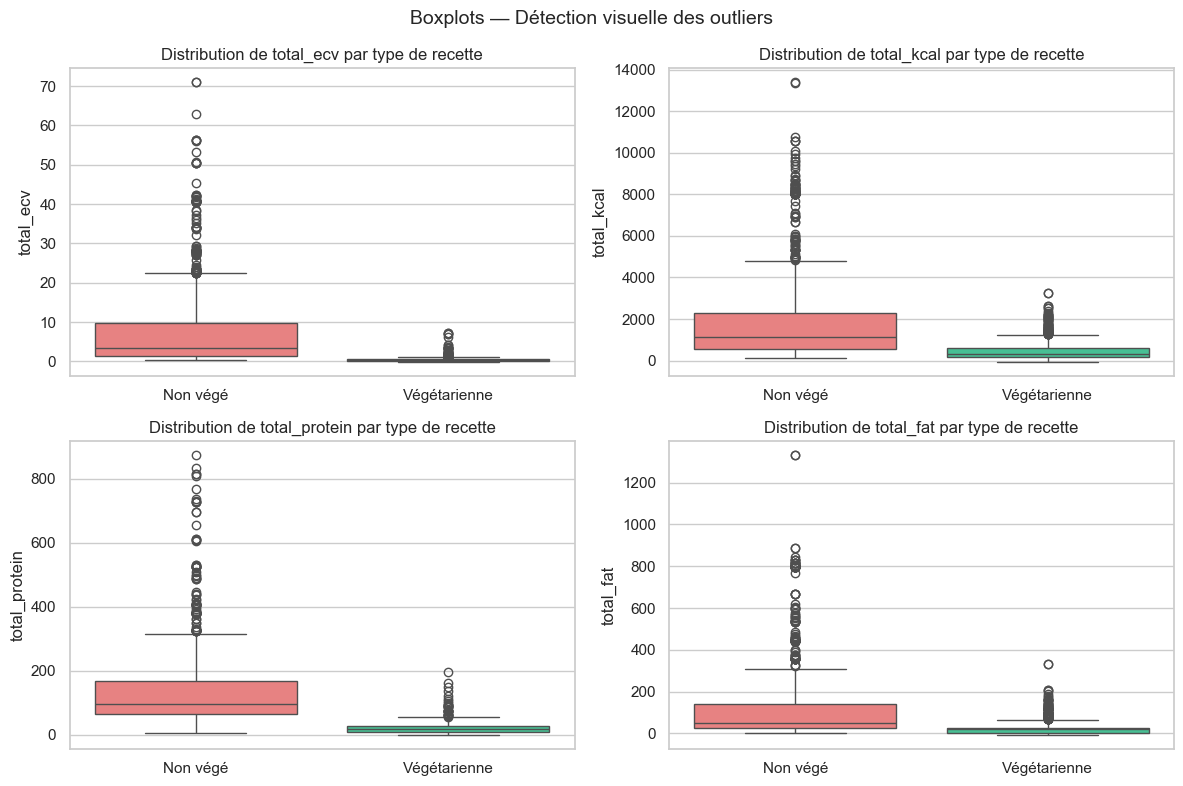

In [66]:
# Version visuelle
numeric_cols = ["total_ecv", "total_kcal", "total_protein", "total_fat"]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(numeric_cols):
    ax = axes[i//2, i%2]
    sns.boxplot(data=df, x="is_vege", y=col,
                palette=["#F87171", "#34D399"], ax=ax)
    ax.set_title(f"Distribution de {col} par type de recette")
    ax.set_xlabel("")
    ax.set_ylabel(col)
    ax.set_xticklabels(["Non végé", "Végétarienne"])

plt.suptitle("Boxplots — Détection visuelle des outliers", fontsize=14)
plt.tight_layout()
plt.show()

In [67]:
# Version quantitative
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outliers[col] = n_outliers

outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Nombre d’outliers'])
display(outliers_df)

,Nombre d’outliers
total_ecv,260
total_kcal,205
total_protein,171
total_fat,244


In [68]:
# Filtre des outliers pour travailler sur df_filtered ? 
df_filtered = df.copy()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]

## 3. Visualization - PCA

In [116]:
data = pd.read_json(RECIPES_FILE)
print("Number of rows (samples):", data.shape[0])
print("Number of variables:", data.shape[1])
display(data.head())
data.describe()

Number of rows (samples): 2049
Number of variables: 9


,title,url,rating,ingredients,total_ecv,total_kcal,total_protein,total_fat,is_vege
0,Lasagnes végétariennes (facile),https://www.marmiton.org/recettes/recette_lasa...,4.8,"[{'ingredient_name': 'tomates', 'quantity': 20...",0.449643,242.400000,15.760000,3.040000,1
1,Hachis parmentier végétarien,https://www.marmiton.org/recettes/recette_hach...,4.6,"[{'ingredient_name': 'poireau', 'quantity': 15...",0.269614,614.366667,6.910000,1.263333,1
2,Curry de légumes végétarien,https://www.marmiton.org/recettes/recette_curr...,4.8,"[{'ingredient_name': 'carotte', 'quantity': 40...",0.357829,224.000000,11.600000,2.400000,1
3,Hamburger Végétarien,https://www.marmiton.org/recettes/recette_hamb...,4.7,"[{'ingredient_name': 'oeuf', 'quantity': 60.0,...",0.112681,142.418182,12.092727,11.127273,1
4,Tourte de Noël végétarienne de Coralie,https://www.marmiton.org/recettes/recette_tour...,4.6,"[{'ingredient_name': 'beurre', 'quantity': 20....",0.270947,261.084848,13.534949,23.467273,1


,rating,total_ecv,total_kcal,total_protein,total_fat,is_vege
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,3.566227,4.365994,1265.643879,79.710559,85.482191,0.475842
std,1.823196,8.337738,1824.189617,107.385338,161.573932,0.499538
min,0.000000,-0.079133,-59.333333,-0.721111,-6.170000,0.000000
25%,3.300000,0.280811,284.836364,20.468586,12.927273,0.000000
50%,4.400000,1.341192,584.200000,40.771010,25.334545,0.000000
75%,4.800000,4.250361,1373.316667,94.759394,75.062500,1.000000
max,5.000000,70.944551,13396.533333,872.433766,1330.613333,1.000000


Scatter matrix of the pairwise features

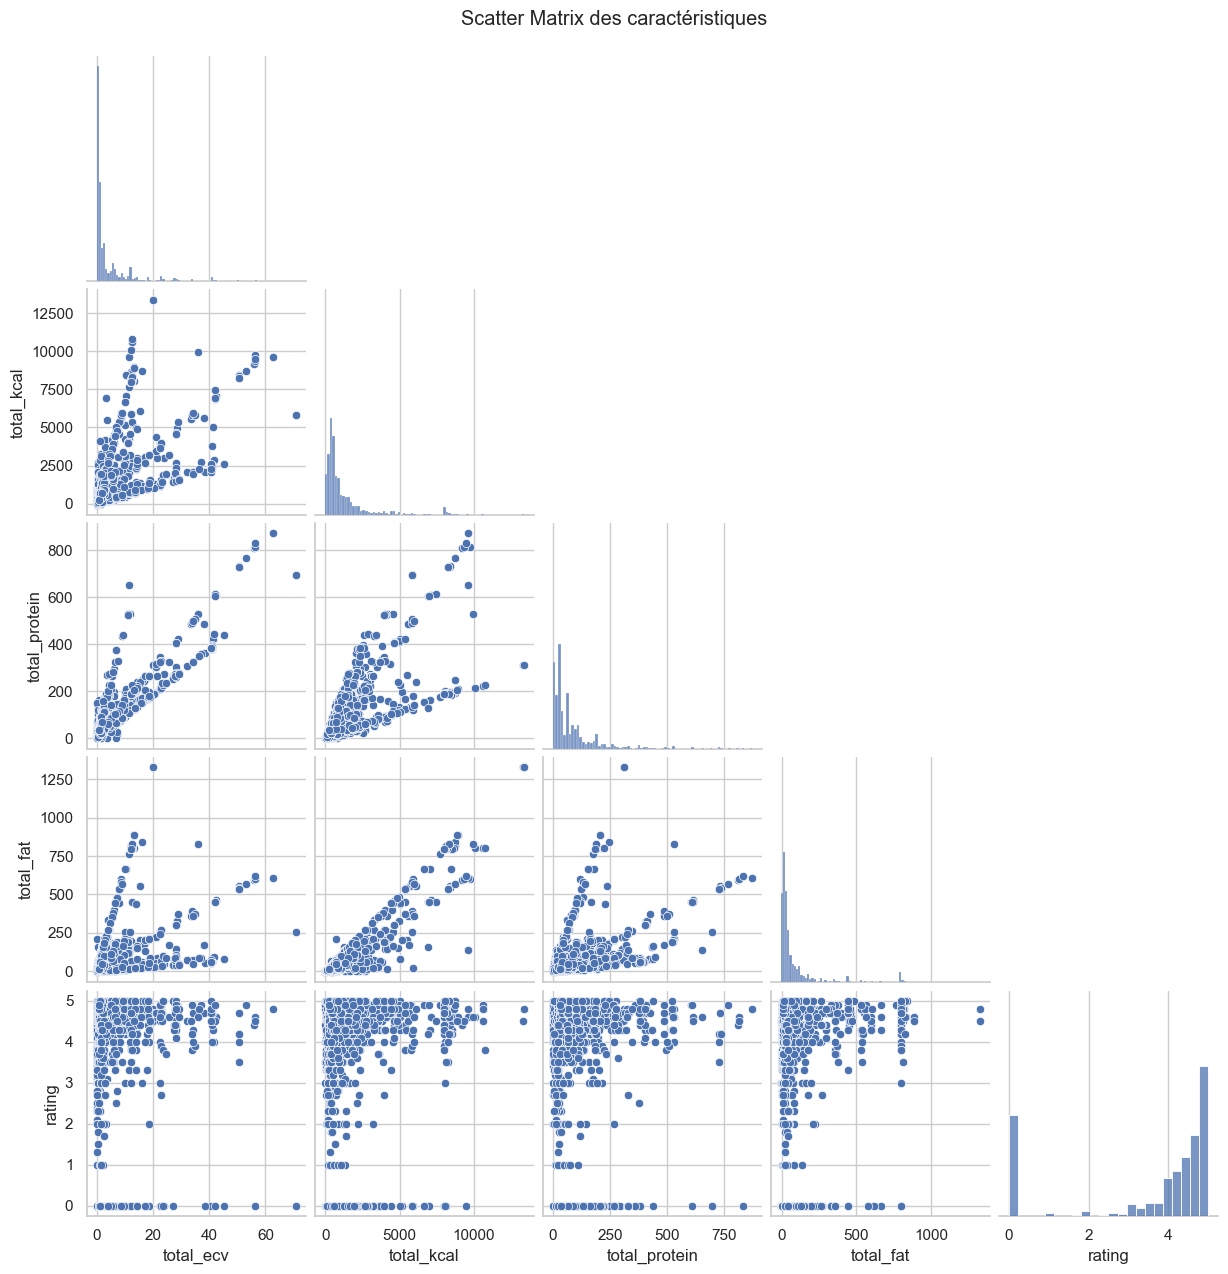

In [81]:
num_features = ["total_ecv", "total_kcal", "total_protein", "total_fat", "rating"]
sns.pairplot(data[num_features], corner=True)
plt.suptitle("Scatter Matrix des caractéristiques", y=1.02)
plt.show()

Violin plots

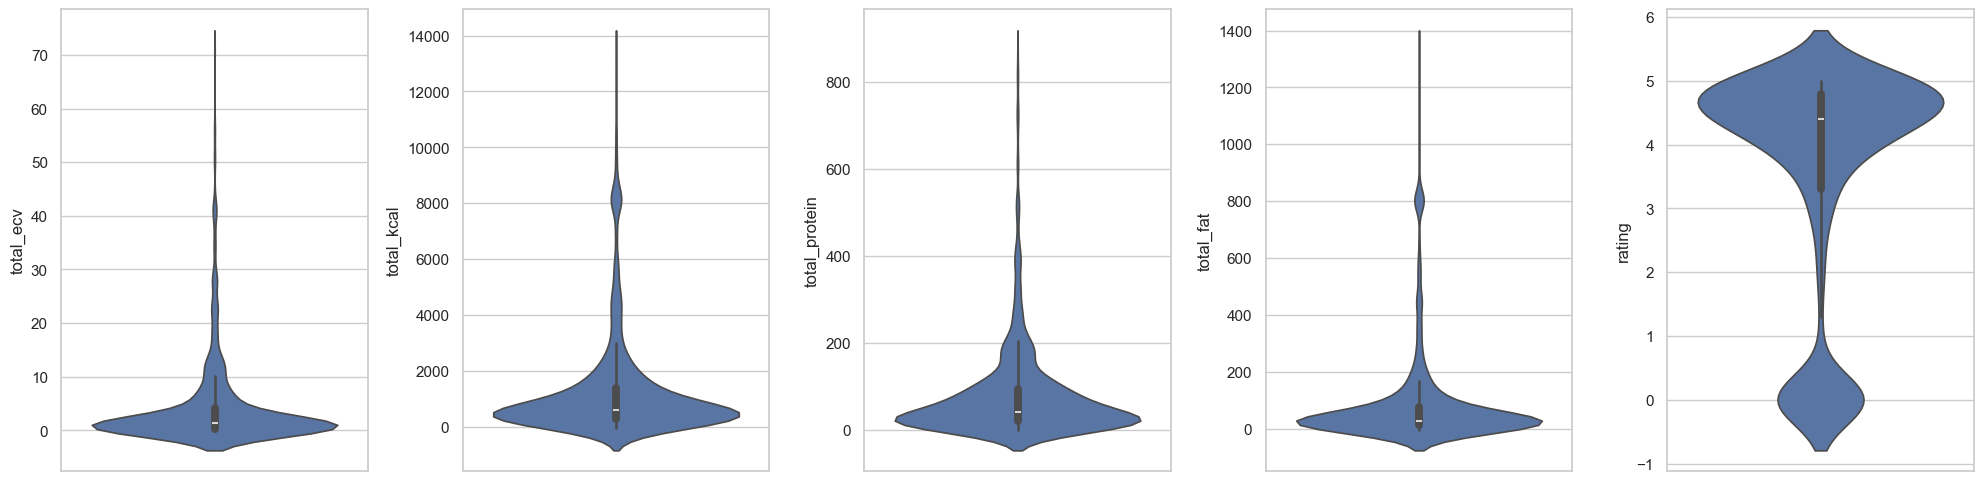

In [108]:
num_features = ["total_ecv", "total_kcal", "total_protein", "total_fat", "rating"]
n_features = len(num_features)


fig, axes = plt.subplots(1, n_features, figsize=(4*n_features, 5))  # 1 ligne, n colonnes
for i, col in enumerate(num_features):
    sns.violinplot(y=data[col], ax=axes[i])

plt.tight_layout()
plt.show()

PCA

In [117]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[num_features])

pca = PCA()
pca.fit(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Sum of explained variance ratio:", pca.explained_variance_ratio_.sum())

# Contribution of each feature to each component
loadings = pd.DataFrame(pca.components_, columns=num_features, index=[f"PC{i+1}" for i in range(len(num_features))])
display(loadings)

Explained variance ratio: [0.6134864  0.1960268  0.16318673 0.02161955 0.00568053]
Sum of explained variance ratio: 0.9999999999999999


,total_ecv,total_kcal,total_protein,total_fat,rating
PC1,0.480065,0.529889,0.505106,0.473040,0.099276
PC2,-0.063759,-0.057587,-0.026911,-0.050796,0.994643
PC3,-0.540546,0.378873,-0.448901,0.602261,0.005897
PC4,0.683553,-0.161915,-0.680052,0.208222,0.026677
PC5,0.077703,0.739013,-0.283127,-0.606282,0.009145


Proportions of variances

,Explained Variance,Explained Variance Ratio,Cumulative Explained Variance
PC1,3.068930,0.613486,0.613486
PC2,0.980613,0.196027,0.809513
PC3,0.816332,0.163187,0.972700
PC4,0.108151,0.021620,0.994319
PC5,0.028416,0.005681,1.000000


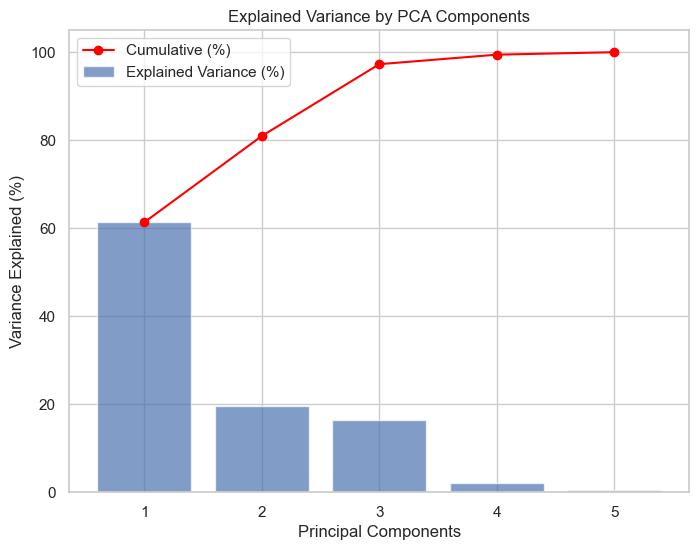

In [121]:
import numpy as np 

summary_table = pd.DataFrame({
    "Explained Variance": pca.explained_variance_,
    "Explained Variance Ratio": pca.explained_variance_ratio_,
    "Cumulative Explained Variance": np.cumsum(pca.explained_variance_ratio_)
}, index=[f"PC{i+1}" for i in range(len(num_features))])

display(summary_table)

explained_var_percent = pca.explained_variance_ratio_ * 100
cumulative_var_percent = np.cumsum(explained_var_percent)

plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_var_percent)+1), explained_var_percent, alpha=0.7, label='Explained Variance (%)')
plt.plot(range(1, len(cumulative_var_percent)+1), cumulative_var_percent, marker='o', color='red', label='Cumulative (%)')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained (%)')
plt.title('Explained Variance by PCA Components')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
# Keep the number of components explaining ≥ 90% variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1

pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)

# Create DataFrame for transformed data
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])
X_pca_df.head()

,PC1,PC2,PC3
0,-0.997956,0.777468,0.005403
1,-0.957982,0.660740,0.124085
2,-1.030036,0.779995,0.022543
3,-1.045429,0.727010,0.051646
4,-0.964360,0.663243,0.105690


## 4. Outlier detection

## 5. Biases